# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#find null values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Standardization of Time and Amount Features 

In [ ]:
#Standardization of data
data.Time = stats.zscore(data['Time'])
data.Amount = stats.zscore(data['Amount'])
data.Amount.head

<bound method NDFrame.head of 0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64>

## Train, Test Splitting

In [ ]:
#split test train data
X = data.iloc[:,:-1].astype('float32')
y = data.iloc[:,-1].astype('int32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 786)

<h2>Building and Compiling a Deep Neural Network Model</h2>

In [ ]:
def build_compile_model(act,opti):
  from tensorflow.keras import regularizers
  print('*****************************')
  print(f'Activation Function = {act}')
  print(f'Optimizer = {opti}')
  dnn = models.Sequential()
  dnn.add(layers.Dense(32, activation=act,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),bias_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)))
  dnn.add(layers.Dropout(0.5))
  dnn.add(layers.Dense(16, activation=act,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),bias_regularizer=regularizers.l2(0.001)))
  dnn.add(layers.Dropout(0.5))
  dnn.add(layers.Dense(1, activation='sigmoid'))
  dnn.compile(optimizer=opti, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
  return dnn

<h2>Predicting, Visualizing loss and Accuracy and Evaluating Performance of a Deep Neural Network Model</h2>

In [ ]:
def predict_evaluate_model(dnn,batch,epoch):
  print(f'Batch size = {batch}')
  print(f'Number of epochs = {epoch}')
  print('*****************************')
  dnn_history = dnn.fit(X_train, y_train, class_weight={0: 1., 1: 4.}, batch_size=batch, validation_split=0.2, epochs=epoch)
  print('Check Learning Curve of Training and Validation Loss to determine underfitting, overfitting and bestfitting')
  loss_train = dnn_history.history['loss']
  loss_val = dnn_history.history['val_loss']
  plt.plot(loss_train, 'g', label='Training loss')
  plt.plot(loss_val, 'r', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print('Check Learning Curve of Training and Validation Accuracy')
  loss_train = dnn_history.history['accuracy']
  loss_val = dnn_history.history['val_accuracy']
  plt.plot(loss_train, 'g', label='Training accuracy')
  plt.plot(loss_val, 'r', label='validation accuracy')
  plt.title('Training and Validation Accuracy Score')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy Score')
  plt.legend()
  plt.show()
  print('Check Confusion Matrix, Accuracy Score, Precision and Recall')
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
  y_pred = dnn.predict(X_test)
  # we have float values in y_pred and binary in y_test so to map it correctly with 0s and 1s we assume that value > 0.5 is considered True (Fraud) else False (No Fraud)
  y_pred = y_pred > 0.5
  # converting y_pred values of True / False to 1s and 0s
  y_pred = y_pred*1
  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  (tn, fp, fn, tp )
  precision = (tp/(tp+fp)) 
  recall = (tp/(tp+fn)) 
  accuracy = ((tp+tn)/(tp+tn+fp+fn)) * 100
  f1 = 2*((precision*recall)/(precision+recall))
  print(f'True Positive: {tp}\nTrue Negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}')
  print(f'accuracy: {accuracy:.4f}%\nHence, accuracy score is not that much valuable so let us see precision, recall and F1 Score metrics to have a good idea of model')
  print(f'precision: {precision*100:.2f}%\nrecall: {recall*100:.2f}%')
  print(f'F1 score conveys the balance between the precision and the recall\nF1 Score = {f1*100:.2f}%')
  cmd = ConfusionMatrixDisplay(cm,display_labels=['No Fraud','Fraud'])
  cmd.plot(values_format='d', cmap='Greens')

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. ... A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

**NOTE**: To Train the best model choose parameters


*   Optimizer: Adam
*   Activation Function: relu or tanh
*   Epochs: 10 - 15
*   Batch Size: 64





*****************************
Activation Function = tanh
Optimizer = adam
Batch size = 64
Number of epochs = 10
*****************************
Epoch 1/10
2493/2493 [==============================] - 5s 2ms/step - loss: 0.3662 - accuracy: 0.9114 - recall_35: 0.4721 - val_loss: 0.0282 - val_accuracy: 0.9993 - val_recall_35: 0.7945
Epoch 2/10
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0355 - accuracy: 0.9990 - recall_35: 0.5814 - val_loss: 0.0191 - val_accuracy: 0.9994 - val_recall_35: 0.7671
Epoch 3/10
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0296 - accuracy: 0.9990 - recall_35: 0.5684 - val_loss: 0.0184 - val_accuracy: 0.9993 - val_recall_35: 0.7945
Epoch 4/10
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0270 - accuracy: 0.9990 - recall_35: 0.6248 - val_loss: 0.0154 - val_accuracy: 0.9994 - val_recall_35: 0.7671
Epoch 5/10
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0266 - accuracy: 0.9990 - re

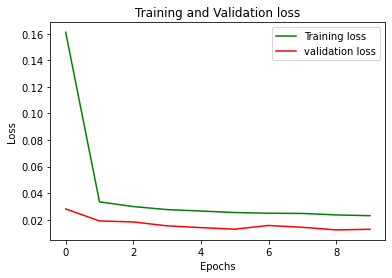

Check Learning Curve of Training and Validation Accuracy


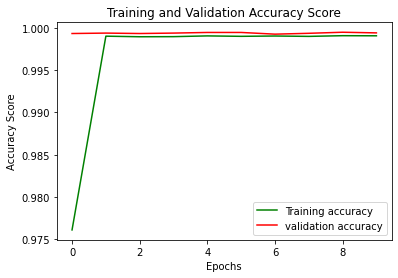

Check Confusion Matrix, Accuracy Score, Precision and Recall
True Positive: 125
True Negative: 85278
False Positive: 19
False Negative: 21
accuracy: 99.9532%
Hence, accuracy score is not that much valuable so let us see precision, recall and F1 Score metrics to have a good idea of model
precision: 86.81%
recall: 85.62%
F1 score conveys the balance between the precision and the recall
F1 Score = 86.21%


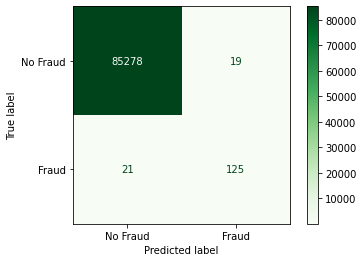

In [ ]:
predict_evaluate_model(build_compile_model('tanh','adam'),64,10)

*****************************
Activation Function = relu
Optimizer = adam
Batch size = 64
Number of epochs = 10
*****************************
Epoch 1/10
2493/2493 [==============================] - 5s 2ms/step - loss: 0.3698 - accuracy: 0.9573 - recall_37: 0.1423 - val_loss: 0.0627 - val_accuracy: 0.9993 - val_recall_37: 0.6438
Epoch 2/10
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0697 - accuracy: 0.9988 - recall_37: 0.4344 - val_loss: 0.0250 - val_accuracy: 0.9994 - val_recall_37: 0.7671
Epoch 3/10
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.9990 - recall_37: 0.5352 - val_loss: 0.0165 - val_accuracy: 0.9994 - val_recall_37: 0.7534
Epoch 4/10
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.9988 - recall_37: 0.4932 - val_loss: 0.0137 - val_accuracy: 0.9995 - val_recall_37: 0.7671
Epoch 5/10
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0269 - accuracy: 0.9990 - re

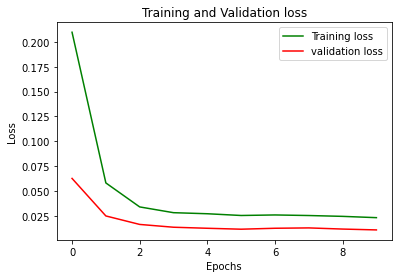

Check Learning Curve of Training and Validation Accuracy


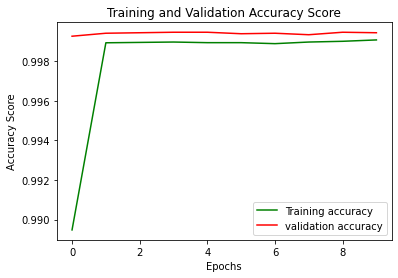

Check Confusion Matrix, Accuracy Score, Precision and Recall
True Positive: 119
True Negative: 85279
False Positive: 18
False Negative: 27
accuracy: 99.9473%
Hence, accuracy score is not that much valuable so let us see precision, recall and F1 Score metrics to have a good idea of model
precision: 86.86%
recall: 81.51%
F1 score conveys the balance between the precision and the recall
F1 Score = 84.10%


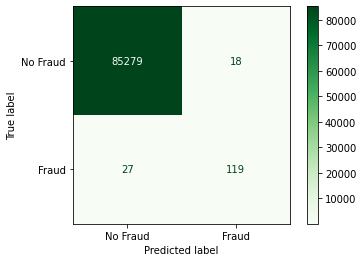

In [ ]:
predict_evaluate_model(build_compile_model('relu','adam'),64,10)